<a href="https://colab.research.google.com/github/dornercr/INFO371/blob/main/INFO371_Week7_Restaurant_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
100%|██████████| 300/300 [00:02<00:00, 125.47it/s]



📋 BoW + KNN – Classification Report:
              precision    recall  f1-score   support

    Positive       1.00      1.00      1.00        25
     Neutral       1.00      1.00      1.00        25
    Negative       1.00      1.00      1.00        25

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



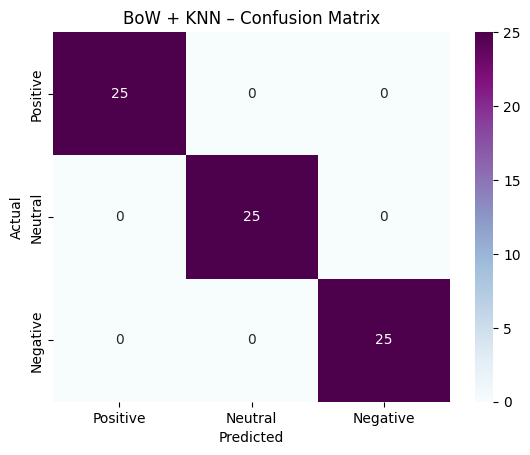


📋 TF-IDF + KNN – Classification Report:
              precision    recall  f1-score   support

    Positive       1.00      1.00      1.00        25
     Neutral       1.00      1.00      1.00        25
    Negative       1.00      1.00      1.00        25

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



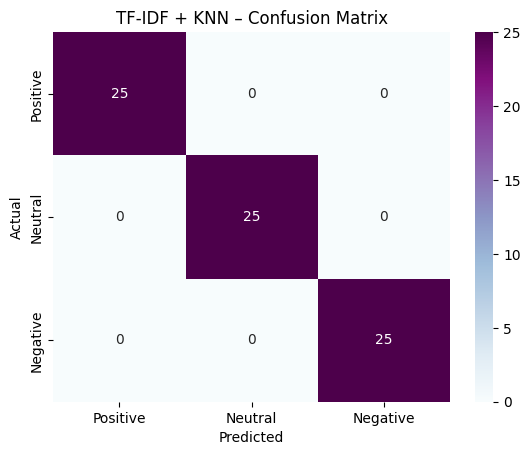


📋 Embeddings + KNN – Classification Report:
              precision    recall  f1-score   support

    Positive       1.00      1.00      1.00        25
     Neutral       1.00      1.00      1.00        25
    Negative       1.00      1.00      1.00        25

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



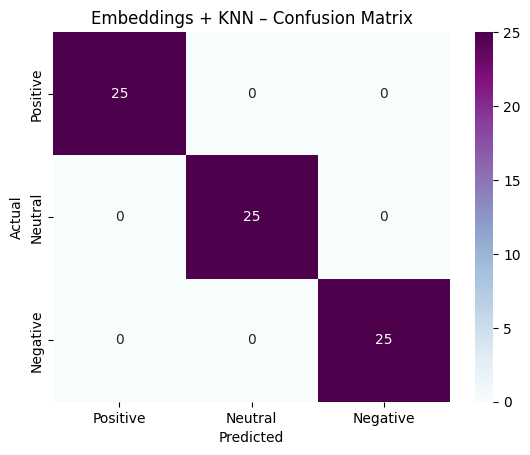

In [4]:
# 🍽️ Restaurant Review Classification using KNN
import pandas as pd, numpy as np, random, spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

# 🧠 Load spaCy model with embeddings
nlp = spacy.load("en_core_web_md")

# 🔧 Custom tokenizer using spaCy
def spacy_tokenizer(text):
    doc = nlp(text)
    return [token.lemma_.lower().strip() for token in doc if not token.is_stop and not token.is_punct]

# 📝 Create synthetic restaurant review samples
positive = [
    "The food was amazing and the service was excellent.",
    "Absolutely loved the atmosphere and the meal.",
    "Best dining experience I've had in months.",
    "Fantastic flavors and wonderful presentation.",
    "Highly recommend this place to everyone."
]
neutral = [
    "It was okay, nothing special.",
    "Average experience, decent food.",
    "Not bad, not great, just fine.",
    "The place was clean and the food was acceptable.",
    "Service was slow but the food was alright."
]
negative = [
    "Terrible experience, I will not return.",
    "Food was cold and service was rude.",
    "Extremely disappointed with the quality.",
    "Waited an hour for bland food.",
    "This was one of the worst meals I've had."
]

data = {"message": [], "label": []}
for _ in range(100):
    data["message"].append(random.choice(positive))
    data["label"].append(0)  # Positive
    data["message"].append(random.choice(neutral))
    data["label"].append(1)  # Neutral
    data["message"].append(random.choice(negative))
    data["label"].append(2)  # Negative

df_reviews = pd.DataFrame(data)

# 🔠 Vectorize
bow_vectorizer = CountVectorizer(tokenizer=spacy_tokenizer)
tfidf_vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer)
X_bow = bow_vectorizer.fit_transform(df_reviews["message"])
X_tfidf = tfidf_vectorizer.fit_transform(df_reviews["message"])
X_embed = np.array([nlp(msg).vector for msg in tqdm(df_reviews["message"])])

# 🧪 KNN Evaluation Function
def evaluate_reviews(X, y, title):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n📋 {title} – Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["Positive", "Neutral", "Negative"]))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', xticklabels=["Positive", "Neutral", "Negative"], yticklabels=["Positive", "Neutral", "Negative"])
    plt.title(f"{title} – Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# 🧠 Run for all vector types
evaluate_reviews(X_bow, df_reviews["label"], "BoW + KNN")
evaluate_reviews(X_tfidf, df_reviews["label"], "TF-IDF + KNN")
evaluate_reviews(X_embed, df_reviews["label"], "Embeddings + KNN")
